# Limpieza de datos

# Business Case

Se ha elegido un Dataset que contiene los rangos salariales de diferentes trabajos de data Scientist.
El objetivo es poder realizar un estimador de salario que ofrezca un salario competitivo a los posibles candidatos.

# 1. Preparación de los datos

## Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Read the Data


*   Describe each column
*   rename the columns' names for easy use




In [ ]:
#from google.colab import files
#files.upload()

In [ ]:


# ID del archivo de Google Drive
#JOBS = 1Fv4NW2H85hyeiaxq9zj7OA5x6uSjqpwP

file_id = '1Fv4NW2H85hyeiaxq9zj7OA5x6uSjqpwP'

# Crea el enlace directo
direct_link = f'https://drive.google.com/uc?id={file_id}'



In [ ]:
# Usa pandas para leer el CSV desde el enlace directo
df = pd.read_csv(direct_link)

# Muestra las primeras filas del DataFrame
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,-1,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),-1


Vemos que no existen valores nulos, pero si observamos el df, podemos comprobar que esto ocurre porque los valores nulos están registrados como -1

In [ ]:
# Reemplazar -1 por NaN en todo el DataFrame para valores numéricos
df.replace(-1, np.nan, inplace=True)

# Para manejar -1 como texto en columnas de tipo 'object', también aplicamos el reemplazo
# Convertimos todo el DataFrame a string para reemplazar '-1' textuales, luego revertimos a los tipos originales
tipos_originales = df.dtypes
df = df.astype(str).replace('-1', np.nan)
df = df.astype(tipos_originales)

Limpiamos la columna 'Company Name'

In [ ]:
# Dividir la columna 'Company Name' en \n y expandir para obtener una lista. Seleccionar el primer elemento de esa lista.
df['Company Name'] = df['Company Name'].str.split('\n').str[0]

Limpiamos los rangos salariales y creamos una columna para poder ordenar por salario

In [ ]:
# Primero, vamos a eliminar el texto y dejar solo los rangos de salario, asumiendo que todos los salarios están en miles
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'[^\dK-]', '')

# Extraemos el rango inferior utilizando expresiones regulares
df['rango_inferior'] = df['Salary Estimate'].str.extract(r'(\d+)K-').astype(float) * 1000

# Muestra las primeras filas para verificar
print(df[['Salary Estimate', 'rango_inferior']].head())

  Salary Estimate  rango_inferior
0       137K-171K        137000.0
1       137K-171K        137000.0
2       137K-171K        137000.0
3       137K-171K        137000.0
4       137K-171K        137000.0


<ipython-input-845-6f085565daac>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'[^\dK-]', '')


Limpiamos la columna Size

In [ ]:
# Limpiar la columna 'Size' para remover ' employees'
df['Size'] = df['Size'].str.replace(' employees', '', regex=False)

# Verificar los cambios
print(df['Size'].head())

0     1001 to 5000
1    5001 to 10000
2     1001 to 5000
3      501 to 1000
4        51 to 200
Name: Size, dtype: object


Por útimo limpiamos la columna Revenue

In [ ]:
# Corrección de la limpieza de la columna 'Revenue'
df['Revenue'] = df['Revenue'].str.replace(r' \(\w+\)', '', regex=True)  # Corregido para eliminar correctamente (USD) y similar

# Para asegurarse de que 'Unknown / Non-Applicable' se maneje adecuadamente
df['Revenue'] = df['Revenue'].replace('Unknown / Non-Applicable', 'Unknown')

# Verificar los cambios
print(df['Revenue'].unique())

['Unknown' '$1 to $2 billion' '$100 to $500 million' '$10+ billion'
 '$2 to $5 billion' '$500 million to $1 billion' '$5 to $10 billion'
 '$10 to $25 million' '$25 to $50 million' '$50 to $100 million'
 '$1 to $5 million' '$5 to $10 million' 'Less than $1 million' nan]


Renombramos las columnas para maximizar su comprensión y compatibilidad con el código

In [ ]:
df.rename(columns={
    'index': 'indice',
    'Job Title': 'titulo_del_trabajo',
    'Salary Estimate': 'estimacion_salarial',
    'Job Description': 'descripcion_del_trabajo',
    'Rating': 'calificacion',
    'Company Name': 'nombre_de_la_empresa',
    'Location': 'ubicacion',
    'Headquarters': 'sede',
    'Size': 'n_empleados',
    'Founded': 'fundacion',
    'Type of ownership': 'tipo_de_propiedad',
    'Industry': 'industria',
    'Sector': 'sector',
    'Revenue': 'ingresos',
    'Competitors': 'competidores'
}, inplace=True)



Decidimos eliminar el índice y la columna descripción en este punto, ya que en la práctica no aportan información y la columna descripción genera cargas computacionales muy altas a la hora de representar las tablas de frecuencia.

Gracias al entendimiento del negocio, sabemos que la columna descripción no nos aportará información para el modelo que vamos a plantear.



In [ ]:
df.drop(['indice', 'descripcion_del_trabajo'], axis=1, inplace=True)


## Descripción de las variables
*  *index*: Es un identificador único para cada fila del conjunto de datos. No tiene valor informativo sobre los datos en sí, pero es útil para referenciar filas específicas.
*   *Job Title*: El título del trabajo. Indica el rol o posición que la empresa está buscando llenar.
*   *Salary Estimate*: Estimación del salario para el puesto listado, según datos de Glassdoor. Esta cifra suele presentarse en un rango.
*   *Job Description*: Descripción detallada del trabajo, que incluye responsabilidades, requisitos, y a veces información sobre la empresa y los beneficios del puesto.
*   *Rating*: Calificación de la empresa según las evaluaciones de empleados o ex-empleados en Glassdoor. Va de 1 a 5, donde 5 es la mejor calificación.
*   *Company Name*: El nombre de la empresa que ofrece el puesto.
*   *Location*: La ubicación geográfica del puesto de trabajo.
*   *Headquarters*: La ubicación de la sede central de la empresa. Puede ser diferente a la ubicación del trabajo.
*   *Size*: El tamaño de la empresa, generalmente expresado en un rango del número de empleados.
*   *Founded*: El año en que la empresa fue fundada.
*   *Type of ownership*: El tipo de propiedad de la empresa, por ejemplo, organización sin fines de lucro, compañía pública, práctica privada, etc.
*   *Industry*: El sector industrial al que pertenece la empresa.
*   *Sector*: El sector del mercado al que pertenece la empresa, que es una categoría más amplia que la industria.
*   *Revenue*: Los ingresos anuales de la empresa, a menudo presentados en un rango.
*   *Competitors*: Otras empresas que son competencia directa en el mismo sector o industria.




##Conclusiones:

Con un simple vistazo  al head del DF podemos ver como los valores nulos están imputados como -1.

Además el nombre de la empresa está mezclado con la valoración de la empresa en la columna 'Company name'

La columna estimacion_salarial contiene rangos de fechas


# Understanding and examinate Data
*   Check the head, shape, data-types of the features
      * Fixing a data type
*   Check the statistical values of features
*   Identifique las columnas que contienen un valor único
      * Elimine las columnas que contengan un solo valor
*   Considere las columnas que tienen muy pocos valores
      * Quite las columnas que tengan una varianza baja
*   Identifique las filas que contienen datos duplicados
      * Eliminar filas que contienen datos duplicados
*   check the missing values
      * fill missing values
*   Detect strange values apart from the NaN Values
      * Clear strange values apart from the NaN Values
*   Check outliers
      * Tienen un impacto significativo en modelos que usan distancias
*   Drop the attributes that provide no useful information
*   Plot distributions

# 2. Sumarize Data

## Describe the data

In [ ]:
df.shape

(672, 14)

In [ ]:
df

,titulo_del_trabajo,estimacion_salarial,calificacion,nombre_de_la_empresa,ubicacion,sede,n_empleados,fundacion,tipo_de_propiedad,industria,sector,ingresos,competidores,rango_inferior
0,Sr Data Scientist,137K-171K,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown,"EmblemHealth, UnitedHealth Group, Aetna",137000.0
1,Data Scientist,137K-171K,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,1968.0,Company - Public,Research & Development,Business Services,$1 to $2 billion,NaN,137000.0
2,Data Scientist,137K-171K,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,1981.0,Private Practice / Firm,Consulting,Business Services,$100 to $500 million,NaN,137000.0
3,Data Scientist,137K-171K,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000.0
4,Data Scientist,137K-171K,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown,"Commerce Signals, Cardlytics, Yodlee",137000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,105K-167K,3.6,TRANZACT,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000,1989.0,Company - Private,Advertising & Marketing,Business Services,Unknown,NaN,105000.0
668,Data Scientist,105K-167K,NaN,JKGT,"San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105000.0
669,Data Scientist,105K-167K,NaN,AccessHope,"Irwindale, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105000.0
670,Data Scientist,105K-167K,5.0,ChaTeck Incorporated,"San Francisco, CA","Santa Clara, CA",1 to 50,NaN,Company - Private,Advertising & Marketing,Business Services,$1 to $5 million,NaN,105000.0


In [ ]:
# Describe each column
df.describe(include='all')

,titulo_del_trabajo,estimacion_salarial,calificacion,nombre_de_la_empresa,ubicacion,sede,n_empleados,fundacion,tipo_de_propiedad,industria,sector,ingresos,competidores,rango_inferior
count,672,672,622.000000,672,672,641,645,554.000000,645,601,601,645,171,672.000000
unique,172,30,NaN,432,207,228,8,NaN,12,57,22,13,107,NaN
top,Data Scientist,79K-131K,NaN,Hatch Data Inc,"San Francisco, CA","New York, NY",51 to 200,NaN,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown,"Roche, GlaxoSmithKline, Novartis",NaN
freq,337,32,NaN,12,69,33,135,NaN,397,66,188,213,10,NaN
mean,NaN,NaN,3.881833,NaN,NaN,NaN,NaN,1984.104693,NaN,NaN,NaN,NaN,NaN,99196.428571
std,NaN,NaN,0.610805,NaN,NaN,NaN,NaN,40.653609,NaN,NaN,NaN,NaN,NaN,33009.958111
min,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,1781.000000,NaN,NaN,NaN,NaN,NaN,31000.000000
25%,NaN,NaN,3.500000,NaN,NaN,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,79000.000000
50%,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,1999.000000,NaN,NaN,NaN,NaN,NaN,91000.000000
75%,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,2010.000000,NaN,NaN,NaN,NaN,NaN,122000.000000


Antes de continuar vamos a eliminar el índice y la columna descripción_del_trabajo, esto es porque se trata de una columna con descripciones de los puestos de trabajo que no vamos a entrar a valorar en este análisis.

### Describe de las variables categóricas

In [ ]:
# descripción de la variable categórica titulo_del_trabajo
df['titulo_del_trabajo'].describe()

count                672
unique               172
top       Data Scientist
freq                 337
Name: titulo_del_trabajo, dtype: object

In [ ]:
df['titulo_del_trabajo'].unique()

array(['Sr Data Scientist', 'Data Scientist',
       'Data Scientist / Machine Learning Expert',
       'Staff Data Scientist - Analytics',
       'Data Scientist - Statistics, Early Career', 'Data Modeler',
       'Experienced Data Scientist', 'Data Scientist - Contract',
       'Data Analyst II', 'Medical Lab Scientist',
       'Data Scientist/Machine Learning', 'Human Factors Scientist',
       'Business Intelligence Analyst I- Data Insights',
       'Data Scientist - Risk', 'Data Scientist-Human Resources',
       'Senior Research Statistician- Data Scientist', 'Data Engineer',
       'Associate Data Scientist', 'Business Intelligence Analyst',
       'Senior Analyst/Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Data Analyst I',
       'Scientist - Molecular Biology',
       'Computational Scientist, Machine Learning',
       'Senior Data Scientist', 'Jr. Data Engineer',
       'E-Commerce Data Analyst', 'Data Analytics Engineer',
       'Product Data Scient

In [ ]:
df['titulo_del_trabajo'].value_counts()

Data Scientist                                            337
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  16
Data Analyst                                               12
                                                         ... 
Data Science Instructor                                     1
Business Data Analyst                                       1
Purification Scientist                                      1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: titulo_del_trabajo, Length: 172, dtype: int64

In [ ]:
# descripción de la variable categórica estimacion_salarial
df['estimacion_salarial'].describe()

count          672
unique          30
top       79K-131K
freq            32
Name: estimacion_salarial, dtype: object

In [ ]:
df['estimacion_salarial'].unique()

array(['137K-171K', '75K-131K', '79K-131K', '99K-132K', '90K-109K',
       '101K-165K', '56K-97K', '79K-106K', '71K-123K', '90K-124K',
       '91K-150K', '141K-225K', '145K-225K', '79K-147K', '122K-146K',
       '112K-116K', '110K-163K', '124K-198K', '79K-133K', '69K-116K',
       '31K-56K', '95K-119K', '212K-331K', '66K-112K', '128K-201K',
       '138K-158K', '80K-132K', '87K-141K', '92K-155K', '105K-167K'],
      dtype=object)

In [ ]:
df['estimacion_salarial'].value_counts()

79K-131K     32
99K-132K     32
75K-131K     32
137K-171K    30
90K-109K     30
56K-97K      22
79K-106K     22
90K-124K     22
110K-163K    21
92K-155K     21
138K-158K    21
128K-201K    21
212K-331K    21
95K-119K     21
69K-116K     21
124K-198K    21
112K-116K    21
122K-146K    21
91K-150K     21
101K-165K    21
79K-147K     20
31K-56K      20
145K-225K    20
141K-225K    20
66K-112K     20
80K-132K     20
87K-141K     20
105K-167K    20
79K-133K     19
71K-123K     19
Name: estimacion_salarial, dtype: int64

In [ ]:
# descripción de la variable categórica nombre_de_la_empresa
df['nombre_de_la_empresa'].describe()

count                672
unique               432
top       Hatch Data Inc
freq                  12
Name: nombre_de_la_empresa, dtype: object

In [ ]:
df['nombre_de_la_empresa'].unique()

array(['Healthfirst', 'ManTech', 'Analysis Group', 'INFICON',
       'Affinity Solutions', 'HG Insights', 'Novartis', 'iRobot',
       'Intuit - Data', 'XSELL Technologies', 'Novetta', '1904labs',
       'PNNL', 'Old World Industries', 'Mathematica Policy Research',
       'Guzman & Griffin Technologies (GGTI)', 'Upside Business Travel',
       'Buckman', 'Insight Enterprises, Inc.', 'Tower Health',
       'Triplebyte', 'PulsePoint', 'Exponent', 'Guardian Life',
       'Spectrum Communications and Consulting', 'Oversight Systems',
       'LSQ', 'MIT Lincoln Laboratory', 'Kingfisher Systems', 'Formation',
       'Cohere Health', 'Acuity Insurance', 'Chef', 'Puget Sound Energy',
       'Sandhills Global', 'A Place for Mom', 'Great-Circle Technologies',
       'Edmunds.com', 'Cambridge Associates, LLC',
       'Liberty Mutual Insurance', 'Cenlar', 'Arsenal Biosciences',
       'Eversight', 'Pfizer', 'Klaviyo', 'Intellectual Ventures',
       'GovTech', 'Quick Base', 'Giving Assistant', 'T

In [ ]:
df['nombre_de_la_empresa'].value_counts()

Hatch Data Inc                 12
Maxar Technologies             12
Tempus Labs                    11
AstraZeneca                    10
Klaviyo                         8
                               ..
Better Hire                     1
Rincon Research Corporation     1
Descript                        1
Trace Data                      1
ChaTeck Incorporated            1
Name: nombre_de_la_empresa, Length: 432, dtype: int64

In [ ]:
# descripción de la variable categórica ubicacion
df['ubicacion'].describe()

count                   672
unique                  207
top       San Francisco, CA
freq                     69
Name: ubicacion, dtype: object

In [ ]:
df['ubicacion'].unique()

array(['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA',
       'Santa Barbara, CA', 'Cambridge, MA', 'Bedford, MA',
       'San Diego, CA', 'Chicago, IL', 'Herndon, VA', 'Saint Louis, MO',
       'Richland, WA', 'Northbrook, IL', 'Washington, DC', 'Remote',
       'Memphis, TN', 'Plano, TX', 'West Grove, PA', 'Phoenix, AZ',
       'Appleton, WI', 'Atlanta, GA', 'Orlando, FL', 'Lexington, MA',
       'McLean, VA', 'San Francisco, CA', 'Sheboygan, WI',
       'United States', 'Bothell, WA', 'Lincoln, NE', 'Overland Park, KS',
       'Santa Monica, CA', 'Portsmouth, NH', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Bellevue, WA',
       'New Orleans, LA', 'Akron, OH', 'Fort Wayne, IN', 'Woburn, MA',
       'Carson, CA', 'Coral Gables, FL', 'Santa Clara, CA',
       'Brisbane, CA', 'Winter Park, FL', 'Redwood City, CA',
       'Peoria, IL', 'Ipswich, MA', 'Carmel, IN', 'Emeryville, CA',
       'Gaithersburg, MD', 'Longmont, CO', 'Austin, TX', 'Yakima, WA',
 

In [ ]:
df['ubicacion'].value_counts()

San Francisco, CA    69
New York, NY         50
Washington, DC       26
Boston, MA           24
Chicago, IL          22
                     ..
Oshkosh, WI           1
Culver City, CA       1
Lake Oswego, OR       1
New Orleans, LA       1
Irwindale, CA         1
Name: ubicacion, Length: 207, dtype: int64

In [ ]:
# descripción de la variable categórica n_empleados
df['n_empleados'].describe()

count           645
unique            8
top       51 to 200
freq            135
Name: n_empleados, dtype: object

In [ ]:
df['n_empleados'].unique()

array(['1001 to 5000', '5001 to 10000', '501 to 1000', '51 to 200',
       '10000+', '201 to 500', '1 to 50', nan, 'Unknown'], dtype=object)

In [ ]:
df['n_empleados'].value_counts()

51 to 200        135
1001 to 5000     104
1 to 50           86
201 to 500        85
10000+            80
501 to 1000       77
5001 to 10000     61
Unknown           17
Name: n_empleados, dtype: int64

In [ ]:
# descripción de la variable categórica tipo_de_propiedad
df['tipo_de_propiedad'].describe()

count                   645
unique                   12
top       Company - Private
freq                    397
Name: tipo_de_propiedad, dtype: object

In [ ]:
df['tipo_de_propiedad'].unique()

array(['Nonprofit Organization', 'Company - Public',
       'Private Practice / Firm', 'Company - Private', 'Government',
       'Subsidiary or Business Segment', 'Other Organization', nan,
       'Unknown', 'Hospital', 'Self-employed', 'College / University',
       'Contract'], dtype=object)

In [ ]:
df['tipo_de_propiedad'].value_counts()

Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: tipo_de_propiedad, dtype: int64

In [ ]:
# descripción de la variable categórica industria
df['industria'].describe()

count                           601
unique                           57
top       Biotech & Pharmaceuticals
freq                             66
Name: industria, dtype: object

In [ ]:
df['industria'].unique()

array(['Insurance Carriers', 'Research & Development', 'Consulting',
       'Electrical & Electronic Manufacturing', 'Advertising & Marketing',
       'Computer Hardware & Software', 'Biotech & Pharmaceuticals',
       'Consumer Electronics & Appliances Stores',
       'Enterprise Software & Network Solutions', 'IT Services', 'Energy',
       'Chemical Manufacturing', 'Federal Agencies', 'Internet',
       'Health Care Services & Hospitals',
       'Investment Banking & Asset Management', 'Aerospace & Defense',
       'Utilities', nan, 'Express Delivery Services',
       'Staffing & Outsourcing', 'Insurance Agencies & Brokerages',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Food & Beverage Manufacturing', 'Banks & Credit Unions',
       'Video Games', 'Shipping', 'Telecommunications Services',
       'Lending', 'Cable, Internet & Telephone Providers', 'Real Estate',
       'Venture Capital & Private Equity', 'Miscellaneous Manufacturing',
       'Oil &

In [ ]:
df['industria'].value_counts()

Biotech & Pharmaceuticals                   66
IT Services                                 61
Computer Hardware & Software                57
Aerospace & Defense                         46
Enterprise Software & Network Solutions     43
Consulting                                  38
Staffing & Outsourcing                      36
Insurance Carriers                          28
Internet                                    27
Advertising & Marketing                     23
Health Care Services & Hospitals            21
Research & Development                      17
Federal Agencies                            16
Investment Banking & Asset Management       13
Banks & Credit Unions                        8
Lending                                      8
Energy                                       5
Consumer Products Manufacturing              5
Telecommunications Services                  5
Insurance Agencies & Brokerages              4
Food & Beverage Manufacturing                4
Chemical Manu

In [ ]:
# descripción de la variable categórica sector
df['sector'].describe()

count                        601
unique                        22
top       Information Technology
freq                         188
Name: sector, dtype: object

In [ ]:
df['sector'].unique()

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', nan,
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

In [ ]:
df['sector'].value_counts()

Information Technology                188
Business Services                     120
Biotech & Pharmaceuticals              66
Aerospace & Defense                    46
Finance                                33
Insurance                              32
Manufacturing                          23
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities           10
Telecommunications                      7
Retail                                  7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: sector, dtype: int64

In [ ]:
# descripción de la variable categórica ingresos
df['ingresos'].describe()

count         645
unique         13
top       Unknown
freq          213
Name: ingresos, dtype: object

In [ ]:
df['ingresos'].unique()

array(['Unknown', '$1 to $2 billion', '$100 to $500 million',
       '$10+ billion', '$2 to $5 billion', '$500 million to $1 billion',
       '$5 to $10 billion', '$10 to $25 million', '$25 to $50 million',
       '$50 to $100 million', '$1 to $5 million', '$5 to $10 million',
       'Less than $1 million', nan], dtype=object)

In [ ]:
df['ingresos'].value_counts()

Unknown                       213
$100 to $500 million           94
$10+ billion                   63
$2 to $5 billion               45
$10 to $25 million             41
$1 to $2 billion               36
$25 to $50 million             36
$50 to $100 million            31
$1 to $5 million               31
$500 million to $1 billion     19
$5 to $10 million              14
Less than $1 million           14
$5 to $10 billion               8
Name: ingresos, dtype: int64

### Comprobación de valores nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   titulo_del_trabajo    672 non-null    object 
 1   estimacion_salarial   672 non-null    object 
 2   calificacion          622 non-null    float64
 3   nombre_de_la_empresa  672 non-null    object 
 4   ubicacion             672 non-null    object 
 5   sede                  641 non-null    object 
 6   n_empleados           645 non-null    object 
 7   fundacion             554 non-null    float64
 8   tipo_de_propiedad     645 non-null    object 
 9   industria             601 non-null    object 
 10  sector                601 non-null    object 
 11  ingresos              645 non-null    object 
 12  competidores          171 non-null    object 
 13  rango_inferior        672 non-null    float64
dtypes: float64(3), object(11)
memory usage: 73.6+ KB


Ahora comprobaremos si existe algún registro duplicado

In [ ]:
print(df.duplicated().any())

True


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(659, 14)

In [ ]:
df.nunique()

titulo_del_trabajo      172
estimacion_salarial      30
calificacion             31
nombre_de_la_empresa    432
ubicacion               207
sede                    228
n_empleados               8
fundacion               102
tipo_de_propiedad        12
industria                57
sector                   22
ingresos                 13
competidores            107
rango_inferior           26
dtype: int64

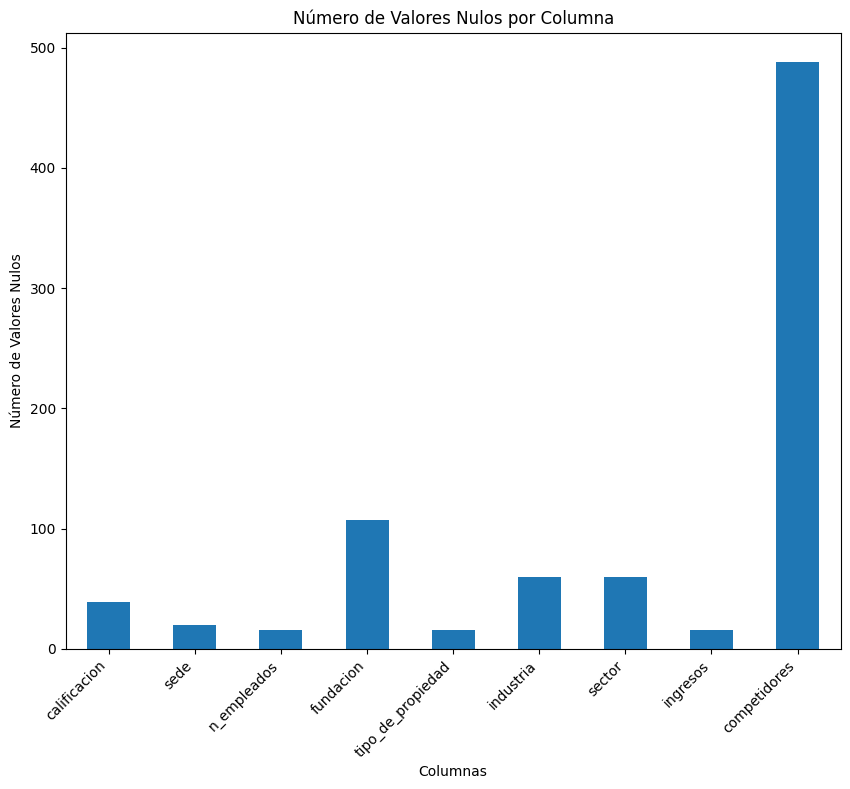

In [ ]:
# Calcular el número de valores nulos por columna
nulos_por_columna = df.isnull().sum()

# Filtrar columnas que tengan al menos un valor nulo
nulos_por_columna = nulos_por_columna[nulos_por_columna > 0]

# Crear un gráfico de barras
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del gráfico según necesites
nulos_por_columna.plot(kind='bar')
plt.title('Número de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Número de Valores Nulos')
plt.xticks(rotation=45, ha="right")  # Rota los nombres de las columnas para mejor legibilidad
plt.show()


In [ ]:
# Contar cuántos 'Unknown' hay en la columna 'ingresos'
count_unknown = df['ingresos'].value_counts().get('Unknown', 0)
count_unknown

212

Ahora podemos ver claramente cuales son las columnas que contienen datos nulos.

Si queremos eliminar competidores (500 valores nulos) habrá que comprobar si los no nulos tienen alguna inferencia sobre la variable objetivo [	estimacion_salarial	], si no detectamos ningún patrón podremos eliminar la vvariable.

In [ ]:
# Paso 1: Filtrar los valores no nulos de la columna 'competidores'
df_no_nulos = df.dropna(subset=['competidores'])


In [ ]:
df_no_nulos.shape

(171, 14)

In [ ]:
df_no_nulos.head()

,titulo_del_trabajo,estimacion_salarial,calificacion,nombre_de_la_empresa,ubicacion,sede,n_empleados,fundacion,tipo_de_propiedad,industria,sector,ingresos,competidores,rango_inferior
0,Sr Data Scientist,137K-171K,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,Unknown,"EmblemHealth, UnitedHealth Group, Aetna",137000.0
3,Data Scientist,137K-171K,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137000.0
4,Data Scientist,137K-171K,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,1998.0,Company - Private,Advertising & Marketing,Business Services,Unknown,"Commerce Signals, Cardlytics, Yodlee",137000.0
8,Staff Data Scientist - Analytics,137K-171K,4.4,Intuit - Data,"San Diego, CA","Mountain View, CA",5001 to 10000,1983.0,Company - Public,Computer Hardware & Software,Information Technology,$2 to $5 billion,"Square, PayPal, H&R Block",137000.0
10,Data Scientist,137K-171K,4.5,Novetta,"Herndon, VA","Mc Lean, VA",501 to 1000,2012.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million,"Leidos, CACI International, Booz Allen Hamilton",137000.0


In [ ]:
# Asegúrate de que los nombres de las columnas en ambos DataFrames son idénticos
# y están en el mismo orden para una comparación adecuada
assert df.columns.equals(df_no_nulos.columns), "Las columnas de ambos DataFrames deben ser iguales."

# Itera sobre los nombres de las columnas de los DataFrames
for columna in df.columns:
    # Crea una figura y dos subplots (ax1, ax2) lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))  # Ajusta el tamaño del gráfico según necesites

    # Gráfico para df
    sns.countplot(x=columna, data=df, ax=ax1)
    ax1.set_title(f'Distribución de {columna} en df')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.set_ylabel('Frecuencia')
    ax1.set_xlabel(columna.capitalize())

    # Gráfico para df_no_nulos
    sns.countplot(x=columna, data=df_no_nulos, ax=ax2)
    ax2.set_title(f'Distribución de {columna} en df_no_nulos')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
    ax2.set_ylabel('Frecuencia')
    ax2.set_xlabel(columna.capitalize())

    # Muestra la figura con ambos subplots
    plt.tight_layout()
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

Los gráficos no parecen indicar ningun dato anómalo ni ninguna tendencia extraña, ni en los datos ni en los datos que contienen valores no nulos en la columna competidores.


### Analísis variable ingresos frenter a variable objetivo salario

Hemos detectado un gran número de registros con Unknowns en esta variable, vamos comprobar si existe alguna relación entre los ingresos de la empresa y el salario ofertado

In [ ]:
# Supongamos que df es tu DataFrame

def mapeo_promedio_ingresos(valor):
    mapeo = {
        'Unknown': np.nan,
        '$1 to $2 billion': 1.5e9,
        '$100 to $500 million': 300e6,
        '$10+ billion': 15e9,  # Asumiendo un promedio para simplificar
        '$2 to $5 billion': 3.5e9,
        '$500 million to $1 billion': 750e6,
        '$5 to $10 billion': 7.5e9,
        '$10 to $25 million': 17.5e6,
        '$25 to $50 million': 37.5e6,
        '$50 to $100 million': 75e6,
        '$1 to $5 million': 3e6,
        '$5 to $10 million': 7.5e6,
        'Less than $1 million': 500e3,  # Asumir $500,000 como promedio
        np.nan: np.nan  # Manejar explícitamente valores NaN
    }
    return mapeo.get(valor, np.nan)  # Devuelve np.nan para cualquier valor no mapeado

In [ ]:
# Aplicar la función a la columna de ingresos
df['ingresos_num'] = df['ingresos'].apply(mapeo_promedio_ingresos)

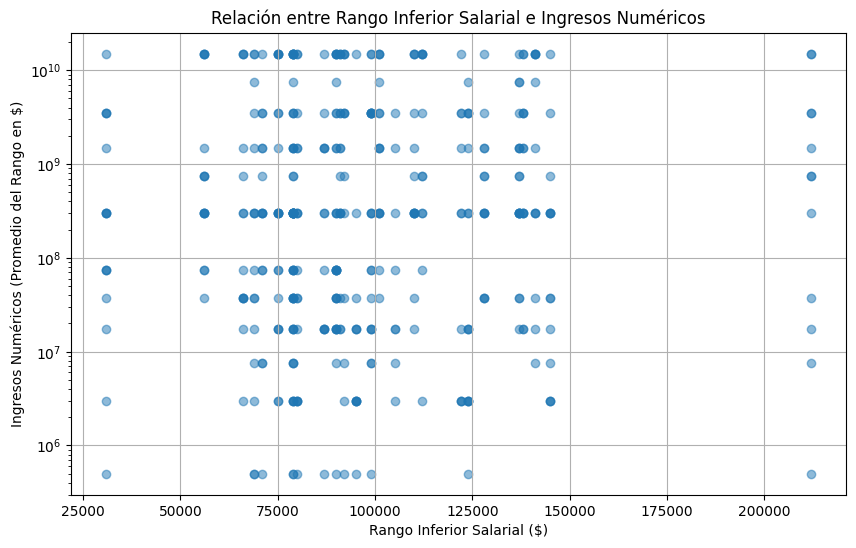

In [ ]:
# Generar el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['rango_inferior'], df['ingresos_num'], alpha=0.5)
plt.title('Relación entre Rango Inferior Salarial e Ingresos Numéricos')
plt.xlabel('Rango Inferior Salarial ($)')
plt.ylabel('Ingresos Numéricos (Promedio del Rango en $)')
plt.yscale('log')  # Escala logarítmica para una mejor visualización si es necesario
plt.grid(True)

plt.show()

No parece existir ninguna correlación entre la variable objetivo y los ingresos de la empresa

### Boxplot de las variables numéricas

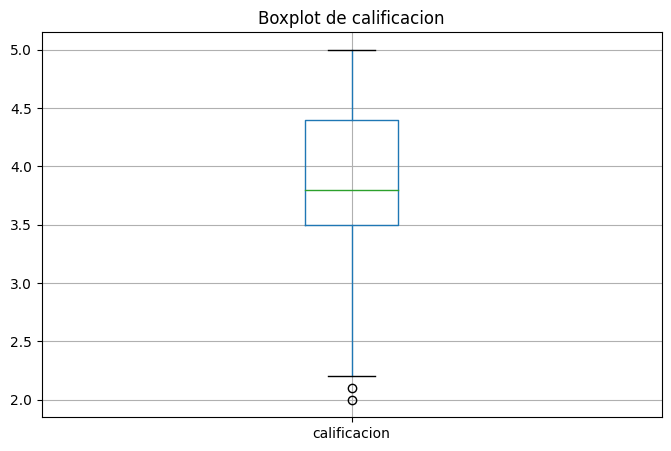

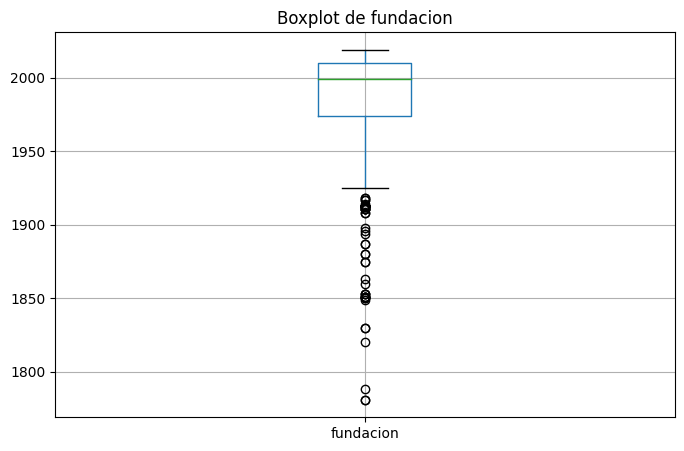

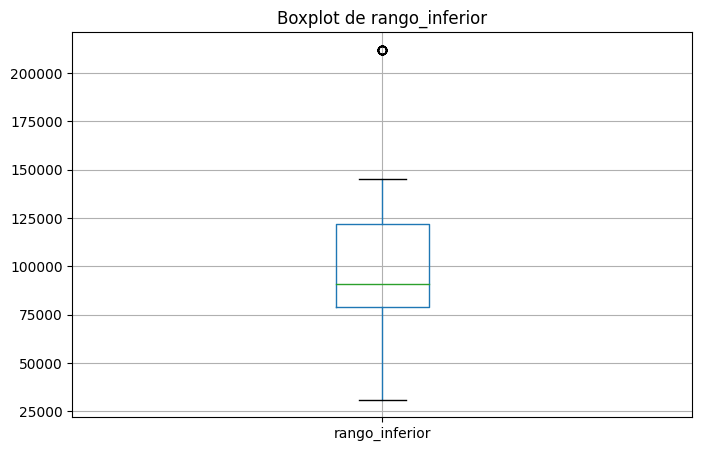

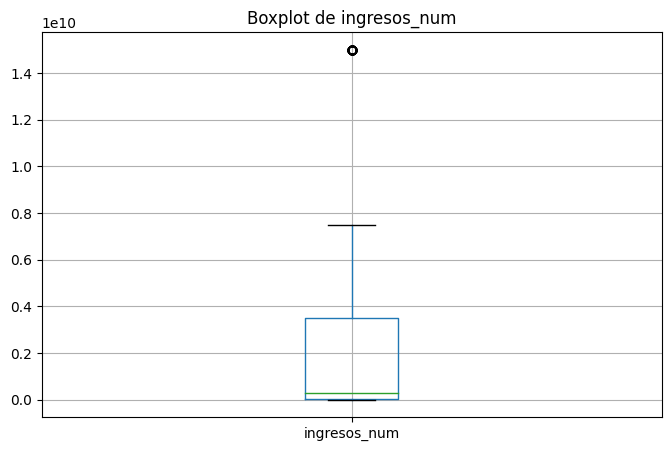

In [ ]:
# Asumiendo que df es tu DataFrame
# Seleccionamos solo las columnas numéricas para el boxplot
columnas_numericas = df.select_dtypes(include=['float64', 'int64'])

# Iteramos sobre cada columna numérica y creamos un boxplot separado para cada una
for columna in columnas_numericas:
    plt.figure(figsize=(8, 5))  # Ajusta el tamaño del gráfico a tus necesidades
    df.boxplot(column=[columna])
    plt.title(f'Boxplot de {columna}')
    plt.show()

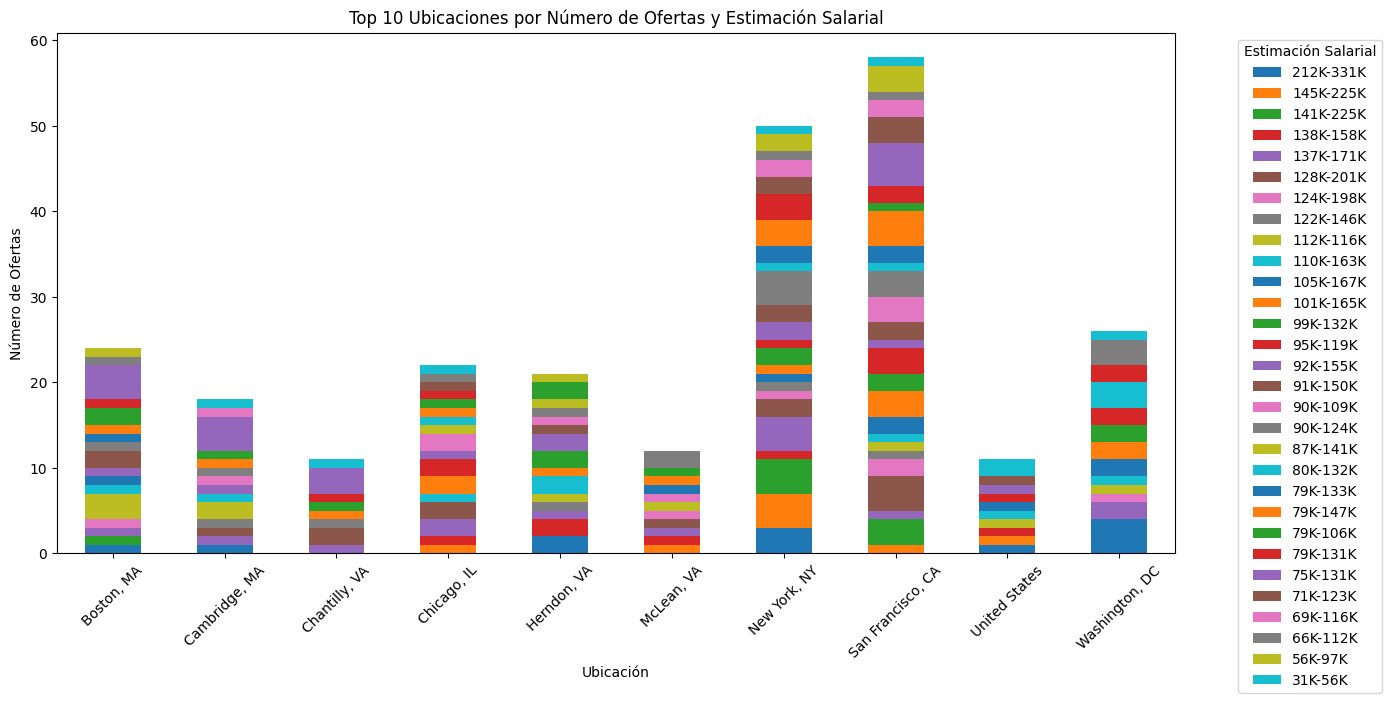

In [ ]:
# Calcular el total de ofertas por ubicación
ofertas_por_ubicacion = df['ubicacion'].value_counts()

# Filtrar el top 10 de ubicaciones
top_10_ubicaciones = ofertas_por_ubicacion.head(10).index

# Filtrar el DataFrame original para incluir solo las top 10 ubicaciones
df_top_10 = df[df['ubicacion'].isin(top_10_ubicaciones)]

# Ordenar las categorías de estimacion_salarial por rango_inferior en orden descendente
categorias_ordenadas = df_top_10.drop_duplicates(subset=['estimacion_salarial', 'rango_inferior'])\
                                .sort_values('rango_inferior', ascending=False)['estimacion_salarial']

# Preparar los datos para el gráfico, agrupando por ubicacion y estimacion_salarial
datos_para_grafico = df_top_10.groupby(['ubicacion', 'estimacion_salarial']).size().unstack(fill_value=0)
datos_para_grafico = datos_para_grafico.reindex(columns=categorias_ordenadas)  # Ordenar las columnas

# Crear el gráfico de columnas apiladas
datos_para_grafico.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('Top 10 Ubicaciones por Número de Ofertas y Estimación Salarial')
plt.xlabel('Ubicación')
plt.ylabel('Número de Ofertas')
plt.xticks(rotation=45)
plt.legend(title='Estimación Salarial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

# 3. Data preparation

## a) Data Cleaning

Ahora tenemos que elegir lo que vamos a hacer con los registros de cada columnas con valores Nan.



Columna 'descripcion_del_trabajo'

Columna 'calificacion': Los reemplazamos por media o mediana

Columna 'nombre_de_la_empresa': Eliminar registro (fila)

Columna 'sede':  DROP COLUMN

Columna 'n_empleados':

Columna 'fundacion': DROP COLUMN

Columna 'tipo_de_propiedad'

Columna 'industria'

Columna 'sector'

Columna 'ingresos'

Competidores: DROP COLUMN




Eliminamos la columna competidores al tener un gran número de nulos, además como hemos visto en el EDA, no existe ninguna relación explicatoria.

Además tras revisar los datos hemos visto que hay rangos de salario que difieren bastante en el rango superior, como es el caso de los rangos 99K-132K y
75K-131K, como el salario máximo puede depender de muchos factores ajenos a este análisis nos quedaremos con el rango inferior como variable dependiente.

por último habrá que eliminar las columnas rango_inferior e ingresos_num

In [ ]:
# Eliminar las columnas especificadas
df = df.drop(['ingresos', 'ingresos_num', 'estimacion_salarial', 'competidores'], axis=1)

In [ ]:
# Reordenar las columnas para poner 'estimacion_salarial' al final
columnas = df.columns.tolist()  # Obtener la lista de columnas
columnas.remove('rango_inferior')  # Remover 'estimacion_salarial' de la lista
columnas.append('rango_inferior')  # Añadir 'estimacion_salarial' al final de la lista

df = df[columnas]  # Reordenar el DataFrame según la nueva lista de columnas

# Mostrar el DataFrame reordenado
df.head()

,titulo_del_trabajo,calificacion,nombre_de_la_empresa,ubicacion,sede,n_empleados,fundacion,tipo_de_propiedad,industria,sector,rango_inferior
0,Sr Data Scientist,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,137000.0
1,Data Scientist,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,1968.0,Company - Public,Research & Development,Business Services,137000.0
2,Data Scientist,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,1981.0,Private Practice / Firm,Consulting,Business Services,137000.0
3,Data Scientist,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,137000.0
4,Data Scientist,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,1998.0,Company - Private,Advertising & Marketing,Business Services,137000.0


Transformamos el formato de 'fundacion' de float a object para que el modelo interprete los datos como un dato categórico.

In [ ]:
df['fundacion'] = df['fundacion'].astype('object')

### Homogeneizamos la columna titulo_del_trabajo

Hemos visto que en la descripción del trabajo existe una gran variedad de nombres diferentes, a continuación veremos cuales.

In [ ]:
# Obtener valores únicos de la columna 'industria'
valores_unicos_industria = df['titulo_del_trabajo'].unique()

# Imprimir los valores únicos
print("Valores únicos en la columna 'titulo_del_trabajo':")
print(valores_unicos_industria)


Valores únicos en la columna 'titulo_del_trabajo':
['Sr Data Scientist' 'Data Scientist'
 'Data Scientist / Machine Learning Expert'
 'Staff Data Scientist - Analytics'
 'Data Scientist - Statistics, Early Career' 'Data Modeler'
 'Experienced Data Scientist' 'Data Scientist - Contract'
 'Data Analyst II' 'Medical Lab Scientist'
 'Data Scientist/Machine Learning' 'Human Factors Scientist'
 'Business Intelligence Analyst I- Data Insights' 'Data Scientist - Risk'
 'Data Scientist-Human Resources'
 'Senior Research Statistician- Data Scientist' 'Data Engineer'
 'Associate Data Scientist' 'Business Intelligence Analyst'
 'Senior Analyst/Data Scientist' 'Data Analyst'
 'Machine Learning Engineer' 'Data Analyst I'
 'Scientist - Molecular Biology'
 'Computational Scientist, Machine Learning' 'Senior Data Scientist'
 'Jr. Data Engineer' 'E-Commerce Data Analyst' 'Data Analytics Engineer'
 'Product Data Scientist - Ads Data Science'
 'Data Scientist - Intermediate' 'Global Data Analyst'
 'Data &

Como vemos existen una gran multitud de nombres diferentes para puestos similares, mediante dos funciones vamos a tratar de simplificarlo, por un lado definiremos si el puesto se trata de un puesto senior, y en segundo lugar categorizaremos el tipo de trabajo.

In [ ]:
# Función para identificar si el título del trabajo es de una posición senior
def es_senior(titulo):
    palabras_senior = ['sr', 'senior', 'lead', 'principal', 'staff']
    for palabra in palabras_senior:
        if palabra in titulo.lower():
            return 1
    return 0

# Función para clasificar el tipo de trabajo
def clasificar_tipo_trabajo(titulo):
    titulo = titulo.lower()
    if 'data scientist' in titulo:
        return 'Data Scientist'
    elif 'data analyst' in titulo:
        return 'Data Analyst'
    elif 'data engineer' in titulo:
        return 'Data Engineer'
    elif 'business intelligence' in titulo:
        return 'Business Intelligence'
    elif 'machine learning' in titulo:
        return 'Machine Learning Engineer'
    elif 'analyst' in titulo:  # Captura otros tipos de analistas
        return 'Other Analyst'
    elif 'engineer' in titulo or 'developer' in titulo:  # Captura otros tipos de ingenieros/desarrolladores
        return 'Other Engineer/Developer'
    else:
        return 'Other'

In [ ]:
# Crear la columna 'es_senior'
df['es_senior'] = df['titulo_del_trabajo'].apply(es_senior)

In [ ]:
# Crear la columna 'tipo_de_trabajo'
df['tipo_de_trabajo'] = df['titulo_del_trabajo'].apply(clasificar_tipo_trabajo)

In [ ]:
# Reordenar las columnas para que 'tipo_de_trabajo' y 'es_senior' estén al principio
columnas = ['tipo_de_trabajo', 'es_senior'] + [col for col in df.columns if col not in ['tipo_de_trabajo', 'es_senior']]

df = df[columnas]

# Mostrar las primeras filas para verificar los cambios
df.head()

,tipo_de_trabajo,es_senior,titulo_del_trabajo,calificacion,nombre_de_la_empresa,ubicacion,sede,n_empleados,fundacion,tipo_de_propiedad,industria,sector,rango_inferior
0,Data Scientist,1,Sr Data Scientist,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,137000.0
1,Data Scientist,0,Data Scientist,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,1968.0,Company - Public,Research & Development,Business Services,137000.0
2,Data Scientist,0,Data Scientist,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,1981.0,Private Practice / Firm,Consulting,Business Services,137000.0
3,Data Scientist,0,Data Scientist,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,137000.0
4,Data Scientist,0,Data Scientist,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,1998.0,Company - Private,Advertising & Marketing,Business Services,137000.0


In [ ]:
df = df.drop(['titulo_del_trabajo'], axis=1)

In [ ]:
# Contar el número de cada tipo de trabajo en la columna 'tipo_de_trabajo'
df['es_senior'].value_counts()

0    560
1     99
Name: es_senior, dtype: int64

In [ ]:
# descripción de la variable categórica estimacion_salarial
df['tipo_de_trabajo'].describe()

count                659
unique                 8
top       Data Scientist
freq                 444
Name: tipo_de_trabajo, dtype: object

In [ ]:
df['tipo_de_trabajo'].unique()

array(['Data Scientist', 'Other', 'Data Analyst', 'Business Intelligence',
       'Data Engineer', 'Machine Learning Engineer',
       'Other Engineer/Developer', 'Other Analyst'], dtype=object)

In [ ]:
df['tipo_de_trabajo'].value_counts()

Data Scientist               444
Other                         56
Data Analyst                  47
Data Engineer                 46
Machine Learning Engineer     35
Other Engineer/Developer      23
Business Intelligence          6
Other Analyst                  2
Name: tipo_de_trabajo, dtype: int64

In [ ]:
df.head()

,tipo_de_trabajo,es_senior,calificacion,nombre_de_la_empresa,ubicacion,sede,n_empleados,fundacion,tipo_de_propiedad,industria,sector,rango_inferior
0,Data Scientist,1,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,137000.0
1,Data Scientist,0,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,1968.0,Company - Public,Research & Development,Business Services,137000.0
2,Data Scientist,0,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,1981.0,Private Practice / Firm,Consulting,Business Services,137000.0
3,Data Scientist,0,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,137000.0
4,Data Scientist,0,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,1998.0,Company - Private,Advertising & Marketing,Business Services,137000.0


## b) Feature Selection

Creamos una columna Dummy con datos aleatorios para tener contra que comparar las métricas

In [ ]:
df2 = df.copy()

In [ ]:
categorias = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
df2['dummy'] = np.random.choice(categorias, size=len(df))

In [ ]:
# Reordenar las columnas para poner 'estimacion_salarial' al final
columnas = df2.columns.tolist()  # Obtener la lista de columnas
columnas.remove('rango_inferior')  # Remover 'estimacion_salarial' de la lista
columnas.append('rango_inferior')  # Añadir 'estimacion_salarial' al final de la lista

df2 = df2[columnas]  # Reordenar el DataFrame según la nueva lista de columnas

# Mostrar el DataFrame reordenado
df2.head()

,tipo_de_trabajo,es_senior,calificacion,nombre_de_la_empresa,ubicacion,sede,n_empleados,fundacion,tipo_de_propiedad,industria,sector,dummy,rango_inferior
0,Data Scientist,1,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,1993.0,Nonprofit Organization,Insurance Carriers,Insurance,F,137000.0
1,Data Scientist,0,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,1968.0,Company - Public,Research & Development,Business Services,F,137000.0
2,Data Scientist,0,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,1981.0,Private Practice / Firm,Consulting,Business Services,J,137000.0
3,Data Scientist,0,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,2000.0,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,J,137000.0
4,Data Scientist,0,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,1998.0,Company - Private,Advertising & Marketing,Business Services,G,137000.0


### Mutual information

Valores Altos vs. Bajos: Un valor más alto indica que la característica correspondiente tiene más información mutua con la variable objetivo, es decir, es probablemente más importante para el modelo.

Características con cero: Un valor de cero (o muy cercano a cero) sugiere que no hay una relación aparente entre esa característica y la variable objetivo, al menos que pueda ser captada por la Información Mutua. Estas características podrían ser candidatas a ser removidas del modelo para simplificarlo.

Mutual information no admite valores Nan por lo tanto habrá que imputar valores a los Nan en este dataframe auxiliar que hemos creado

In [ ]:
# Para 'calificacion', calculamos el valor promedio y lo imputamos donde falten valores
promedio_calificacion = df2['calificacion'].mean()
df2['calificacion'].fillna(promedio_calificacion, inplace=True)

# Para 'sede', 'n_empleados', 'industria', y 'sector', calculamos la moda y la imputamos donde falten valores
for columna in ['sede', 'n_empleados', 'industria', 'sector', 'tipo_de_propiedad']:
    moda = df2[columna].mode()[0]
    df2[columna].fillna(moda, inplace=True)

# Para 'fundacion', convertimos a float, calculamos el promedio y lo imputamos, y luego revertimos a object
fundacion_float = pd.to_numeric(df2['fundacion'], errors='coerce')
promedio_fundacion = fundacion_float.mean()
fundacion_float.fillna(promedio_fundacion, inplace=True)
df2['fundacion'] = fundacion_float.astype(int).astype(str)


In [ ]:
# Reordenar las columnas para poner 'estimacion_salarial' al final
columnas = df2.columns.tolist()  # Obtener la lista de columnas
columnas.remove('rango_inferior')  # Remover 'estimacion_salarial' de la lista
columnas.append('rango_inferior')  # Añadir 'estimacion_salarial' al final de la lista

df2 = df2[columnas]  # Reordenar el DataFrame según la nueva lista de columnas

# Mostrar el DataFrame reordenado
df2.head()

,tipo_de_trabajo,es_senior,calificacion,nombre_de_la_empresa,ubicacion,sede,n_empleados,fundacion,tipo_de_propiedad,industria,sector,dummy,rango_inferior
0,Data Scientist,1,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,1993,Nonprofit Organization,Insurance Carriers,Insurance,F,137000.0
1,Data Scientist,0,4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,1968,Company - Public,Research & Development,Business Services,F,137000.0
2,Data Scientist,0,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,1981,Private Practice / Firm,Consulting,Business Services,J,137000.0
3,Data Scientist,0,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,J,137000.0
4,Data Scientist,0,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,1998,Company - Private,Advertising & Marketing,Business Services,G,137000.0


In [ ]:
# Calcular el número de valores nulos por columna
nulos_por_columna = df2.isnull().sum()

In [ ]:
nulos_por_columna

tipo_de_trabajo         0
es_senior               0
calificacion            0
nombre_de_la_empresa    0
ubicacion               0
sede                    0
n_empleados             0
fundacion               0
tipo_de_propiedad       0
industria               0
sector                  0
dummy                   0
rango_inferior          0
dtype: int64

Feature tipo_de_trabajo: 1.510070246917363
Feature es_senior: 1.3626498001508507
Feature calificacion: 2.6921906182274373
Feature nombre_de_la_empresa: 50.94559506660538
Feature ubicacion: 82.24346858166831
Feature sede: 24.821045674219437
Feature n_empleados: 7.665061668295239
Feature fundacion: 4.173186795047237
Feature tipo_de_propiedad: 1.810489553116678
Feature industria: 116.32723830774006
Feature sector: 6.6928847091160915
Feature dummy: 10.736742739686289


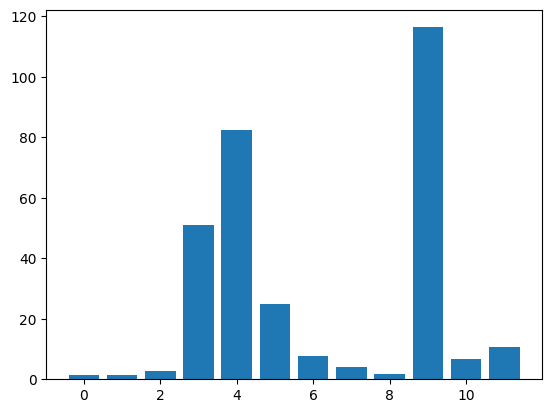

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot
import random
import numpy as np

# Setting the seed for reproducibility
np.random.seed(10)
random.seed(10)

# Since 'df2' is not defined in this context, we will continue using the DataFrame 'df' we defined earlier
# In the actual implementation, 'df2' should be replaced with the actual DataFrame variable

columnas = df2.columns.tolist()  # Get the list of columns

# Encoding the 'rango_inferior' as a categorical variable for the chi-squared test
# For a regression problem, we would need to categorize the target. Here we'll assume it's categorical for the sake of demonstration
df2['rango_inferior'] = pd.qcut(df2['rango_inferior'], q=4, labels=False)

# Preparing the feature matrix and target vector
X = df2.drop('rango_inferior', axis=1)
y = df2['rango_inferior']

# Since all variables are categorical, we can use OrdinalEncoder for all
oe = OrdinalEncoder()
oe.fit(X)
X_encoded = oe.transform(X)

# Using LabelEncoder for the target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Feature selection using chi-squared test
fs = SelectKBest(score_func=chi2, k='all')  # Setting 'k' to 'all' to select all features

fs.fit(X_encoded, y_encoded)
X_fs = fs.transform(X_encoded)

# Print the chi-squared scores
for i in range(len(fs.scores_)):
    print(f'Feature {columnas[i]}: {fs.scores_[i]}')

# Plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


La variale Dummy puede ayudarnos a establecer un umbral sobre las variables que aportan y las que son ruido
En este caso nos quedariamos con nombre_de_la_empresa, ubicacion, sede e industria


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Asumimos que 'df' es tu DataFrame ya cargado y listo para usar

# Separar características y la variable objetivo
X = df2.drop('rango_inferior', axis=1)
y = df2['rango_inferior']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el preprocesamiento para variables numéricas
numeric_features = ['calificacion']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Definir el preprocesamiento para variables categóricas ordinales
ordinal_features = ['n_empleados', 'fundacion']
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())])

# Definir el preprocesamiento para variables categóricas con one-hot encoding
categorical_features = ['es_senior', 'nombre_de_la_empresa', 'ubicacion', 'sede', 'tipo_de_propiedad', 'industria', 'sector', 'tipo_de_trabajo', 'dummy']  # 'dummy' fue removido por el problema anterior
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinar los transformadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('cat', categorical_transformer, categorical_features)])

# Crear el pipeline con preprocesamiento y el modelo XGBoost
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Las características después de la codificación one-hot y ordinal están todas en una matriz, necesitamos manejar esto para visualizar correctamente
encoded_features = numeric_features + ordinal_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_features))

# Implementación ajustada del mapeo de importancias
feature_importances = pipeline.named_steps['model'].feature_importances_

# Mapear las importancias de las características transformadas a las originales
feature_importances_mapped = {}

for transformed_name, importance in zip(encoded_features, feature_importances):
    # Esto divide por el primer '_', que funciona para las características one-hot
    original_name = transformed_name.split('_')[0] if '_' in transformed_name else transformed_name
    if original_name in feature_importances_mapped:
        feature_importances_mapped[original_name] += importance
    else:
        feature_importances_mapped[original_name] = importance

# Convierte el mapeo en una Serie de pandas para fácil visualización y ordenación
feature_importances_series = pd.Series(feature_importances_mapped).sort_values(ascending=False)

# Imprime las importancias mapeadas y ordenadas
print(feature_importances_series)



nombre          0.411318
industria       0.147565
sede            0.124604
ubicacion       0.122920
tipo            0.076713
sector          0.055869
dummy           0.036655
fundacion       0.007930
es              0.006532
n               0.006041
calificacion    0.003853
dtype: float32


Según la selección de variables usando XGBoost las siguientes variables tienen un performance superior al dummy: nombre, ubicacion , industria, sede, tipo y sector

En este caso además de las variables que obteniamos en el caso de mutual information también obtenemos tipo y sector, de las cuales sólo nos quedaremos con 'tipo', ya que sector performa muy cercano al dummy y por bussiness understanding sabemos que lo que se puede obtener de 'sector' ya está explicado en 'industria'

nombre_de_la_empresa, ubicacion, sede e industria

## c) Data Transforms

In [ ]:
variables = ['nombre_de_la_empresa', 'ubicacion', 'industria', 'sede', 'tipo_de_propiedad']

In [ ]:
df_modelo = df.copy()

df_modelo = df_modelo[['nombre_de_la_empresa', 'ubicacion', 'industria', 'sede', 'tipo_de_propiedad','rango_inferior']]

df_modelo

,nombre_de_la_empresa,ubicacion,industria,sede,tipo_de_propiedad,rango_inferior
0,Healthfirst,"New York, NY",Insurance Carriers,"New York, NY",Nonprofit Organization,137000.0
1,ManTech,"Chantilly, VA",Research & Development,"Herndon, VA",Company - Public,137000.0
2,Analysis Group,"Boston, MA",Consulting,"Boston, MA",Private Practice / Firm,137000.0
3,INFICON,"Newton, MA",Electrical & Electronic Manufacturing,"Bad Ragaz, Switzerland",Company - Public,137000.0
4,Affinity Solutions,"New York, NY",Advertising & Marketing,"New York, NY",Company - Private,137000.0
...,...,...,...,...,...,...
667,TRANZACT,"Fort Lee, NJ",Advertising & Marketing,"Fort Lee, NJ",Company - Private,105000.0
668,JKGT,"San Francisco, CA",NaN,NaN,NaN,105000.0
669,AccessHope,"Irwindale, CA",NaN,NaN,NaN,105000.0
670,ChaTeck Incorporated,"San Francisco, CA",Advertising & Marketing,"Santa Clara, CA",Company - Private,105000.0


# Modeling & Evaluation
*   Split-out validation dataset
      * Evita overfitting
*   Feature Selection
*   Transform data with normalización o estandarización
*   Examining Numerical and Categorical variables
*   Assign Categorical Types to Numeric Types
      * Use OrdinalEncoder, LabelEncoder etc
*   Dimensionality reduction
*   Select Evaluation metric (R2, MSE or Accuraccy), de momento estas
      * La precisión está sesgada cuando hay un desequilibrio en los datos. El cálculo de precisión favorecería la clase mayoritaria, ya que el modelo que sigue prediciendo la clase mayoritaria tendría una gran precisión.

      * La precisión considera las predicciones falsas iguales entre sí, ya sea un falso positivo o un falso negativo. En realidad, algunas clasificaciones erróneas cuestan más que otras. Por ejemplo, un falso negativo en la predicción del cáncer es más peligroso que un falso positivo.

      * Ya vereis Precision, Recall, or F1 score

*   Select baseline model
*   Select Algorithms, solo regresion lineal y logistica, futuro os he dejado el codigo preparado
Chequea linealidad entre Xs e Y
*   Compare Algorithms
*   Improve metric--> adding new features (Feature engineering

In [ ]:
col = variables

In [ ]:
#split the train_data to train data and labels
X_train_full = df_modelo.drop('rango_inferior', axis=1)
y_train_full = df_modelo['rango_inferior']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      test_size=.1, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Preprocesamiento para datos categóricos: imputación y codificación one-hot
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
         ('cat', categorical_transformer, col)])  # Asegúrate de definir la lista 'col' con tus variables categóricas


In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

In [ ]:
#!pip install catboost

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

forest_reg = RandomForestRegressor()
tree_reg = DecisionTreeRegressor()
XGB_reg = XGBRegressor()
catboost_reg = CatBoostRegressor(loss_function='MAE', silent = True)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

def display_scores(models, X_valid=X_valid, y_valid=y_valid):
    name, rmse, mae ,score ,rmse_scores= [],[],[],[],[]
    for model in models:
        name.append(type(model).__name__)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        rmse.append(np.sqrt(mean_squared_error(y_valid, y_pred)))
        mae.append(mean_absolute_error(y_valid, y_pred))
        scores = cross_val_score(model, X_valid, y_valid, scoring="neg_mean_squared_error", cv=10).mean()
        score.append(-scores.T.round(2))
        rmse_scores.append(np.sqrt(-scores.T.round(2)))
    result = pd.DataFrame({'MODEL':name, 'RMSE':rmse, 'MAE':mae, 'SCORES MEAN':score, 'SCORES RMSE':rmse_scores})
    return result.style.highlight_min(subset=['RMSE','MAE', 'SCORES MEAN', 'SCORES RMSE'], color='green').highlight_max(subset=['RMSE','MAE', 'SCORES MEAN', 'SCORES RMSE'], color='red')


In [ ]:
models = [tree_reg, XGB_reg, catboost_reg,forest_reg]
display_scores(models)

,MODEL,RMSE,MAE,SCORES MEAN,SCORES RMSE
0,DecisionTreeRegressor,44541.947349,33361.616162,1459277380.950000,38200.489276
1,XGBRegressor,36996.387679,27821.660985,1112749819.290000,33357.904900
2,CatBoostRegressor,31737.152309,23107.264265,982616804.650000,31346.719201
3,RandomForestRegressor,36989.872241,27904.900617,1053686410.570000,32460.536203


Genero datos aleatorios para realizar predicciones, simulando que soy un cliente.

In [ ]:
#Remuestreo por Columna
nuevas_columnas = {}
for columna in df_modelo.columns:
    # Remuestreo de los valores de la columna con reemplazo
    # Utiliza el tamaño original del DataFrame para el remuestreo
    nuevas_columnas[columna] = df_modelo[columna].sample(frac=1, replace=True, random_state=42).values

#Reconstrucción del DataFrame
X_test = pd.DataFrame(nuevas_columnas)

# Ahora df_generado contiene nuevas filas generadas a partir de los datos originales
X_test = X_test.drop('rango_inferior', axis=1)

In [ ]:
X_test_final = X_test

In [ ]:
X_train_full = preprocessor.fit_transform(X_train_full)
X_test = preprocessor.transform(X_test)

Parametros a ajustar

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

catboost_reg = CatBoostRegressor(random_state=42, verbose=False)

param_grid = {
    'learning_rate': [ 0.05, 0.1, 0.15],
    'depth': [3, 4, 5],
    'l2_leaf_reg': [8, 9, 11, 13, 15],
    'loss_function': ['MAE']
}

grid_search = GridSearchCV(catboost_reg, param_grid, cv=5, scoring='neg_mean_squared_error')


In [ ]:
grid_search.fit(X_train_full, y_train_full)

best_model = grid_search.best_estimator_

print('Best parameters:')
print(best_model.get_params())

Best parameters:
{'learning_rate': 0.05, 'depth': 3, 'l2_leaf_reg': 8, 'loss_function': 'MAE', 'verbose': False, 'random_state': 42}


In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
rango_inferior_serie = pd.Series(y_pred, name='RangoInferior')

# Unir la serie al DataFrame original
X_test_final_con_predicciones = pd.concat([X_test_final, rango_inferior_serie], axis=1)

In [ ]:
X_test_final_con_predicciones.head()

,nombre_de_la_empresa,ubicacion,industria,sede,tipo_de_propiedad,RangoInferior
0,Evidation,"Santa Barbara, CA",Internet,"San Mateo, CA",Company - Private,90356.492883
1,DCS Corp,"Hampton, VA",Research & Development,"Alexandria, VA",Company - Private,91002.535887
2,Comcast,"New York, NY",NaN,"Philadelphia, PA",Company - Public,93700.360128
3,Tivity Health,"Chandler, AZ",Health Care Services & Hospitals,"Franklin, TN",Company - Public,95247.416505
4,Tempus Labs,"Redwood City, CA",Biotech & Pharmaceuticals,"Chicago, IL",Company - Private,96159.000989


# Presentation
*   Document what you have done
*   Create a short presentation (5 slides)
*   Explain why your solution achieves the business objective
*   Don’t forget to present interesting points you noticed along the way
*   Describe what worked and what did not.
*   List your assumptions
*   Ensure your key findings are communicated through visualizations or easy-to-remember statements